In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import glob
from unidecode import unidecode


In [26]:
data_path = './data/processed/2024_01_18_clean_player_data.csv'
df = pd.read_csv(data_path)
df =df.drop(columns=['Unnamed: 0'])





hr_df = pd.DataFrame()

file_pattern = './data/hr_*.csv'
file_paths = glob.glob(file_pattern)

for file_path in file_paths:
    df = pd.read_csv(file_path)
    hr_df = pd.concat([hr_df, df], ignore_index=True)


capfriendly_path = './data/capfriendly.csv'

cap_df = pd.read_csv(capfriendly_path)

Name mismatch issues:

- Non english characters
- Aj vs A.J.
- dashes?

In [27]:
unidecode('Jacob Markström')

'Jacob Markstrom'

In [28]:
test_name = 'Jacob Markstrom'
cap_df[cap_df['Player'] == test_name]


,Unnamed: 0,specific_pos,Cap%,Player,Salary
583,19,G,7.2,Jacob Markstrom,6000000.0


In [29]:
hr_df[hr_df['Player'] == test_name]

,Unnamed: 0,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,...,HIT,FOW,FOL,FO%,Ht,Wt,S/C,Exp,Salary,Team
629,17,Jacob Markstrom,34.0,G,26,0,2,2,0,0,...,0,0,0,NaN,6-6,207,-/L,13,8000000.0,CGY


In [36]:
df.isna().sum()

Unnamed: 0     0
Player         0
Age            0
Pos            0
GP             0
G              0
A              0
PTS            0
+/-            0
PIM            0
EV             0
PP             0
SH             0
GW             0
EV.1           0
PP.1           0
SH.1           0
S              0
S%            21
TOI            0
ATOI           0
OPS            0
DPS            0
PS             0
BLK            0
HIT            0
FOW            0
FOL            0
FO%           75
Ht             0
Wt             0
S/C            0
Exp            0
Salary         2
Team           0
dtype: int64

In [31]:
df[df['Salary'] == 11250000.0]

,Unnamed: 0,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,...,HIT,FOW,FOL,FO%,Ht,Wt,S/C,Exp,Salary,Team


In [32]:
df.head(10)

,Unnamed: 0,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,...,HIT,FOW,FOL,FO%,Ht,Wt,S/C,Exp,Salary,Team
0,0,J.T. Miller,30.0,C,44,20,40,60,23,35,...,91,461,396,53.8,6-1,218,L/-,11,1000000.0,VAN
1,1,Elias Pettersson,25.0,C,44,23,35,58,19,4,...,49,213,228,48.3,6-2,176,L/-,5,10250000.0,VAN
2,2,Elias Pettersson,25.0,C,44,23,35,58,19,4,...,49,213,228,48.3,6-2,176,L/-,5,775000.0,VAN
3,3,Quinn Hughes,24.0,D,44,11,41,52,33,20,...,16,0,0,NaN,5-10,180,L/-,5,8600000.0,VAN
4,4,Brock Boeser,26.0,RW,44,27,19,46,21,4,...,18,6,9,40.0,6-1,208,R/-,7,6650000.0,VAN
5,5,Filip Hronek,26.0,D,44,3,33,36,33,26,...,34,0,0,NaN,6-0,190,R/-,5,5500000.0,VAN
6,6,Ilya Mikheyev,29.0,F,40,10,12,22,5,4,...,20,6,12,33.3,6-3,192,L/-,4,5350000.0,VAN
7,7,Dakota Joshua,27.0,C,43,11,10,21,13,39,...,125,25,26,49.0,6-3,206,L/-,3,850000.0,VAN
8,8,Conor Garland,27.0,RW,44,6,15,21,12,8,...,14,0,1,0.0,5-10,165,R/-,5,6000000.0,VAN
9,9,Sam Lafferty,28.0,C,44,10,9,19,15,26,...,61,77,132,36.8,6-1,195,R/-,4,1150000.0,VAN


<Axes: xlabel='Exp', ylabel='Salary'>

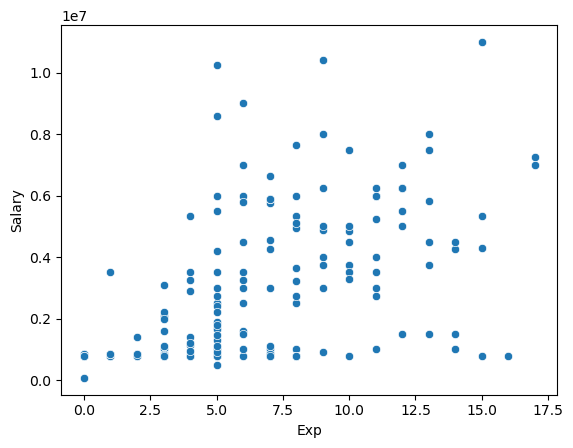

In [33]:
sns.scatterplot(data=df, x='Exp', y='Salary')